In [1]:
import numpy as np
from skimage import io, color

In [2]:
channel_color = 2

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

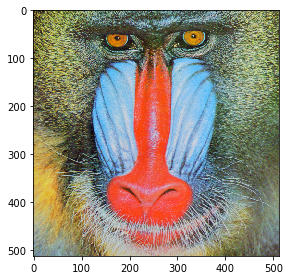

In [3]:
img = io.imread("baboon.png")
io.imshow(img) 
io.show()

In [4]:
img.shape

(512, 512, 3)

### Converting to CIELab

In [5]:
lab = color.rgb2hsv(img)
lab.shape

(512, 512, 3)

In [6]:
#Define the threshold value to define the 0 or 1
threshold = 128

## Appling the mask

In [7]:
#Set the luminance channel to be used
luminance = lab[:,:,2]

#Define the matriz with erro of each pixel
# erro = np.zeros([luminance.shape[0], luminance.shape[1]])

#Output image
# g = luminance.copy()
g = np.zeros([luminance.shape[0], luminance.shape[1]])

In [8]:
# erro = 0

In [9]:
def create_middle_tons(luminance, g, mask, limit=1):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image
    for row in range(luminance.shape[0]-limit):
        for collumn in range(luminance.shape[1]-limit):
            if luminance[row][collumn] < threshold:
                g[row][collumn] = 0
            else:
                g[row][collumn] = 1

            erro = luminance[row][collumn] - g[row][collumn] * 255

            #Applyig the mask
            luminance = mask(luminance, erro, row, collumn)
    return luminance

## Mask functions

In [10]:
def mask_Steinberg(luminance, erro, row, collumn):
    """
    Apply the Floyd e Steinberg in a pixel of the image, and return the luminance and erro;
    """
    luminance[row+1][collumn] += 7/16 * erro
    luminance[row-1][collumn+1] += 3/16 * erro
    luminance[row][collumn+1] += 5/16 * erro
    luminance[row+1][collumn+1] += 1/16 * erro
    
    return luminance 

## Aplying the masks

In [11]:
import matplotlib.pyplot as plt

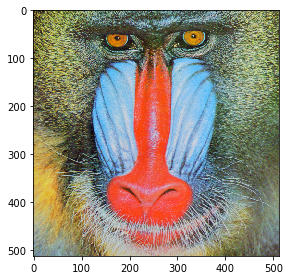

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


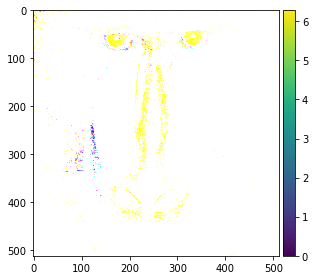

In [18]:
#Floyd e Steinberg Result
lab_Steinberg = lab.copy()
luminance_Steinberg = luminance.copy()
g_Steinberg = luminance.copy()

luminance_Steinberg = create_middle_tons(luminance_Steinberg, g_Steinberg, mask_Steinberg)
a = luminance_Steinberg
lab_Steinberg[:,:,channel_color] = a
io.imshow(img)
io.show()
io.imshow(color.hsv2rgb(lab_Steinberg)) 
io.show()

In [13]:
# plt.imshow(color.hsv2rgb(lab_Steinberg))

In [14]:
# a = luminance_Steinberg/np.linalg.norm(luminance_Steinberg)
normalized_x = luminance_Steinberg / np.sqrt(np.sum(luminance_Steinberg**2))

In [15]:
np.max(luminance_Steinberg)

6.282623862442334

In [16]:
# Manual test

In [19]:
a

array([[0.64313725, 0.59270833, 0.62289369, ..., 0.91048152, 1.11916045,
        1.28438154],
       [0.77156863, 1.14282705, 0.97943881, ..., 1.53683488, 1.73709281,
        1.33960128],
       [0.72579657, 1.3507566 , 1.26763084, ..., 1.87413164, 1.85517682,
        1.25900213],
       ...,
       [0.98170237, 1.82631971, 2.40569155, ..., 2.56042783, 2.4919205 ,
        1.49994186],
       [1.09223988, 1.7042553 , 2.07994627, ..., 2.05634237, 2.0883566 ,
        1.0979842 ],
       [0.52491377, 0.98152374, 1.15932333, ..., 1.19350717, 1.19123959,
        0.31558461]])